In [64]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
import matplotlib.pyplot as plt

# for plotting consistently with abu_profile
from nugridpy import utils as u

data_dir="/data/nugrid_apod2"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [65]:
# get mesa data
star2 = ms.star_log(mass=2.0,Z=0.02)
star3 = ms.star_log(mass=3.0,Z=0.02)

# get post processing data
star2_pp = mp.se(mass=2.0,Z=0.02)
star3_pp = mp.se(mass=3.0,Z=0.02)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...
nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 3.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...
nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools
nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 3.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools


## Useful functions

In [66]:
# function to find the maximum extent of convection zone as well as the average extent

def mass_bounds(star,model_range):
    # just need the star objects, and the model range that the convection zone is contained in

    # get the mass ranges of convection boundary
    star_mass = star.get('star_mass')[model_range[0]:model_range[1]]
    mix_low = star.get('mx2_bot')[model_range[0]:model_range[1]]
    mix_high = star.get('mx2_top')[model_range[0]:model_range[1]]
    
    # find where they are zero or not
    convection_bounds = []
    for i in range(len(star_mass) - 1):
        
        # make sure that there is convection and that the next element doesnt stop
        if mix_low[i] >= 1e-9 and mix_low[i+1] >= 1e-9:
            convection_bounds.append(i)
            
    # slice the arrays to the appropriate size
    star_mass = star_mass[convection_bounds[0]:(convection_bounds[-1] + 1)]
    mix_low = mix_low[convection_bounds[0]:(convection_bounds[-1] + 1)] * star_mass
    mix_high = mix_high[convection_bounds[0]:(convection_bounds[-1] + 1)] * star_mass
    
    # make sure that if there
    
    # return the max convection bounds as well as average AND new model range
    max_bounds = [min(mix_low),max(mix_high)]
    avg_bounds = [np.mean(mix_low),np.mean(mix_high)]
    model_range = [int(model_range[0] + convection_bounds[0]), int(model_range[0] + convection_bounds[-1])]
    
    # NOTE model_range is an index and NOT a model number!
    return max_bounds,avg_bounds, model_range
    
# function to find the nearest mass element index to a particular mass
def find_mass_index(star_pp,model,mass_interest):
    
    # check if model is a list of multiple stars to look through
    if type(model) == float or type(model) == int:
        model = [model]
        iterate = len(model)
    else:
        iterate = len(model)
    
    # check if mass interest is a list or not
    mass_bool = 0
    if type(mass_interest) == float or type(mass_interest) == int:
        mass_bool = 0
    else:
        mass_bool = 1 
    
    # create a np array to hold the mass index
    mass_index = np.zeros((iterate))
    
    # iterate through
    for i in range(iterate):
        
        # read in the mass array
        mass = star_pp.se.get(int(model[i]),'mass')
        
        # is mass interest a list
        if mass_bool:
            mass_index[i] = int(np.argmin(abs(mass_interest[i] - mass)))
        else:
            mass_index[i] = int(np.argmin(abs(mass_interest - mass)))
    
    # return the mass index array
    return mass_index

Make a log dt vs model number plot with temperature at the bottom of the convection zone to see how these temperatures vary. It was seen that in the M=2 models, log T ~ 8.4 was when the Ne-22 reaction really kicked off but it was at a time step that was ~ 10 years in length (can't resolve convection time scale)

## Mass = 2M$_{\odot}$

In [67]:
# Thermal pulse of interest is at model numbers..
model_range = [53000,54000]

# find the convection model number range
mass_b,mass_b1,conv_bounds = mass_bounds(star2,model_range)

# conv bounds ARE MODEL NUMBERS, need index for slicing

# get the log dt, model numbers, and bottom convection boundary for convection boundaries
log_dt = star2.get('log_dt')[conv_bounds[0]:conv_bounds[1]]
model_number = star2.get('model_number')[conv_bounds[0]:conv_bounds[1]]
mx_bot = star2.get('mx2_bot')[conv_bounds[0]:conv_bounds[1]] * star2.get('star_mass')[conv_bounds[0]:conv_bounds[1]]

# find the bottom convection zone bass index
mass_index = find_mass_index(star2_pp,model_number,mx_bot)

 reading ['mass']...100%

In [68]:
# find the temperature for each model number AT convective boundary
temperature = []

for i in range(len(mass_index)):
    
    # read in the temperature
    temp = star2_pp.get(int(model_number[i]),'temperature')
    
    # get the temperature at mass index, append
    temperature.append(temp[int(mass_index[i])] * 1e9)

 reading ['temperature']...100%

In [69]:
star10 = ms.star_log(mass=25.0,Z=0.02)
time = star10.get('star_age')[-1]

# sum all  dts, assume years
time_dt = star10.get('log_dt')
time_dt = 10**(time_dt)
print np.sum(time_dt)
print time

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 25.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...
7579485.96472
7579485.96472


In [70]:
10**(np.min(log_dt)) * 365.25

0.67927810720922299

<IPython.core.display.Javascript object>


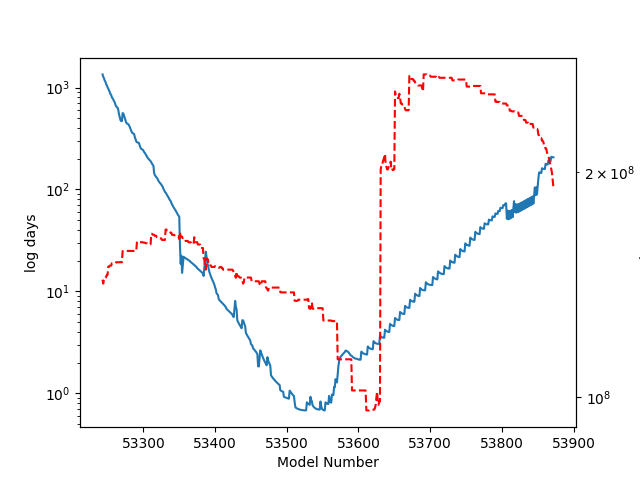

In [71]:
# make a plot of log dt and temperature
fig = plt.figure(1)
ax1 = fig.add_subplot(111)

# plot log dt first
ax1.plot(model_number,10**(log_dt) * 365.25)

# log y axis
ax1.semilogy()
ax1.set_ylabel('log days')
ax1.set_xlabel('Model Number')

# make second but with temperature
ax2 = ax1.twinx()

# plot temperature
ax2.plot(model_number,temperature,'r--')

# log y axis
ax2.semilogy()
ax2.set_ylabel('log T')

## Mass = 3M$_{\odot}$

In [72]:
# Thermal pulse of interest is at model numbers..
model_range = [50500,52000]

# find the convection model number range
mass_b,mass_b1,conv_bounds = mass_bounds(star3,model_range)

# conv bounds ARE MODEL NUMBERS, need index for slicing

# get the log dt, model numbers, and bottom convection boundary for convection boundaries
log_dt = star3.get('log_dt')[conv_bounds[0]:conv_bounds[1]]
model_number = star3.get('model_number')[conv_bounds[0]:conv_bounds[1]]
mx_bot = star3.get('mx2_bot')[conv_bounds[0]:conv_bounds[1]] * star3.get('star_mass')[conv_bounds[0]:conv_bounds[1]]

# find the bottom convection zone bass index
mass_index = find_mass_index(star3_pp,model_number,mx_bot)

 reading ['mass']...100%

In [73]:
# find the temperature for each model number AT convective boundary
temperature = []

for i in range(len(mass_index)):
    
    # read in the temperature
    temp = star3_pp.get(int(model_number[i]),'temperature')
    
    # get the temperature at mass index, append
    temperature.append(temp[int(mass_index[i])] * 1e9)

 reading ['temperature']...100%

<IPython.core.display.Javascript object>


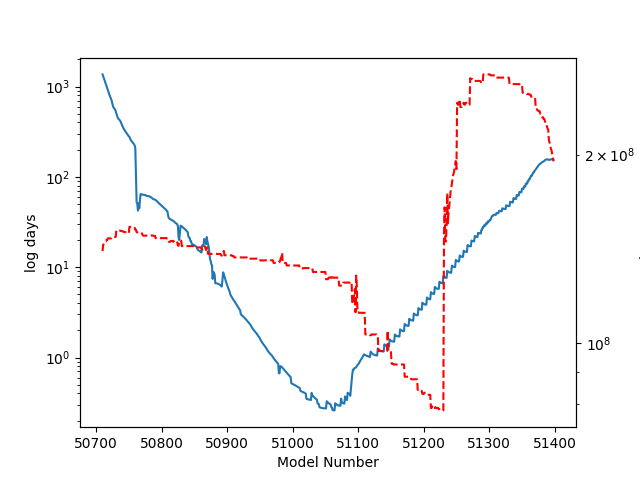

In [74]:
# make a plot of log dt and temperature
fig = plt.figure(2)
ax1 = fig.add_subplot(111)

# plot log dt first
ax1.plot(model_number,10**(log_dt) * 365.25)

# log y axis
ax1.semilogy()
ax1.set_ylabel('log days')
ax1.set_xlabel('Model Number')

# make second but with temperature
ax2 = ax1.twinx()

# plot temperature
ax2.plot(model_number,temperature,'r--')

# log y axis
ax2.semilogy()
ax2.set_ylabel('log T')